# Labeling: Excess Return Over Median

![image_example](img/distribution_over_median.png)
_*Fig. 1:*_ Distribution of excess over median return for 22 stock tickers from period between Jan 2019 and May 2020.

## Abstract

In this notebook, we demonstrate labeling financial returns data according to excess over median. Using cross-sectional data on returns of many different stocks, each observation is labeled according to whether (or how much) its return exceeds the median return. Correlations can then be found between features and the likelihood that a stock will outperform the market.

## Introduction
This technique is used in the following paper:
["The benefits of tree-based models for stock selection"](https://link.springer.com/article/10.1057/jam.2012.17) by _Zhu et al._ (2012). 

In that paper, independent composite features are constructed as weighted averages of various parameters in fundamental and quantitative analysis, such as PE ratio, corporate cash flows, debt etc. The composite features are applied as parameters in linear regression or a decision tree to predict whether a stock will outperform the market median return.


## How it works

A dataframe containing forward total stock returns is calculated from close prices. The median return of all companies at time $t$ in the dataframe is used to represent the market return, and excess returns are calculated by subtracting the median return from each stock's return over the time period $t$ \[Zhu et al. 2012\]. The numerical returns over median can then be used as is (for regression analysis), or can be relabeled simply to its sign (for classification analysis).

At time $t$:

$$P_t = \{p_{t,0}, p_{t,1}, ..., p_{t,n}\}$$
$$m_t = median(P_t)$$
$$L(P_t) = \{p_{t,0} - m_t, p_{t,1} - m_t, ...,p_{t,n} - m_t\}$$

If categorical rather than numerical labels are desired:

$$
     \begin{equation}
     \begin{split}
       L(p_{t,n}) = \begin{cases}
       -1 &\ \text{if} \ \ p_{t,n} - m_t < 0\\
       0 &\ \text{if} \ \ p_{t,n} - m_t = 0\\
       1 &\ \text{if} \ \ p_{t,n} - m_t > 0\\
       \end{cases}
     \end{split}
     \end{equation}
$$

---
## Examples of use

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf

from mlfinlab.labeling import excess_over_median

import matplotlib.pyplot as plt

In [2]:
# Load price data for 22 stocks
tickers = "AAPL MSFT COST PFE SYY F GE BABA AMD CCL ZM FB WFC JPM NVDA CVX AAL UBER C UA VZ NOK"

data = yf.download(tickers, start="2019-01-20", end="2020-05-25",
                   group_by="ticker")
data = data.loc[:, (slice(None), 'Adj Close')]
data.columns = data.columns.droplevel(1)
data.head()

[*********************100%***********************]  22 of 22 completed


,AMD,FB,BABA,NVDA,MSFT,AAL,C,JPM,COST,F,...,UA,ZM,UBER,NOK,VZ,AAPL,PFE,CVX,SYY,CCL
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-22,19.760000,147.570007,152.149994,148.102676,103.568062,32.219025,59.116608,98.963676,209.413116,7.837517,...,18.590000,NaN,NaN,5.846427,54.096535,150.266403,39.946537,105.162872,60.661575,51.750248
2019-01-23,19.799999,144.300003,152.029999,148.620316,104.577469,31.146364,59.384232,98.713730,209.107468,7.689988,...,18.400000,NaN,NaN,5.924772,54.827435,150.874130,39.842587,104.273567,60.884239,51.512947
2019-01-24,20.850000,145.830002,155.860001,157.131958,104.077667,33.124386,59.938599,98.771400,207.352509,7.929724,...,18.860001,NaN,NaN,6.032495,54.172474,149.678253,38.699097,106.258125,60.535717,52.224846
2019-01-25,21.930000,149.009995,159.210007,159.431610,105.028282,34.423378,61.190701,99.396294,206.129929,8.169458,...,19.490000,NaN,NaN,6.463387,53.536488,154.638153,38.406132,105.986641,60.041988,52.689953
2019-01-28,20.180000,147.470001,158.919998,137.390930,102.980049,35.988075,61.028221,99.867378,207.806046,7.985046,...,19.370001,NaN,NaN,6.355664,52.274014,153.207047,37.357147,105.003731,60.284012,53.534740


We find the excess return over median for all tickers in the time period, calculate the mean and standard deviation of returns, and plot the distribution.

In [3]:
excess1 = excess_over_median(data)
excess1.head()

,AMD,FB,BABA,NVDA,MSFT,AAL,C,JPM,COST,F,...,UA,ZM,UBER,NOK,VZ,AAPL,PFE,CVX,SYY,CCL
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-22,0.001406,-0.022777,-0.001406,0.002877,0.009129,-0.033911,0.003909,-0.003143,-0.002077,-0.019441,...,-0.010838,NaN,NaN,0.012783,0.012893,0.003427,-0.003220,-0.009074,0.003053,-0.005203
2019-01-23,0.043061,0.000634,0.015223,0.047302,-0.014748,0.053538,-0.000634,-0.009385,-0.018362,0.021206,...,0.015031,NaN,NaN,0.008213,-0.021915,-0.017895,-0.038669,0.009063,-0.015693,0.003851
2019-01-24,0.034036,0.004044,0.003731,-0.003127,-0.008629,0.021453,0.003127,-0.011436,-0.023659,0.012470,...,0.015642,NaN,NaN,0.053666,-0.029502,0.015375,-0.025333,-0.020317,-0.025918,-0.008857
2019-01-25,-0.070535,-0.001071,0.007443,-0.128981,-0.010238,0.054719,0.006609,0.014004,0.017396,-0.013309,...,0.003107,NaN,NaN,-0.007402,-0.014317,0.000010,-0.018049,-0.000010,0.013295,0.025297
2019-01-28,-0.040490,-0.016647,-0.007242,-0.040851,-0.014771,-0.002062,-0.004429,0.008386,0.003412,0.017142,...,-0.017121,NaN,NaN,0.014840,-0.026909,-0.004770,0.036963,0.002564,0.002062,0.003112


We can visualize the distribution as a histogram.

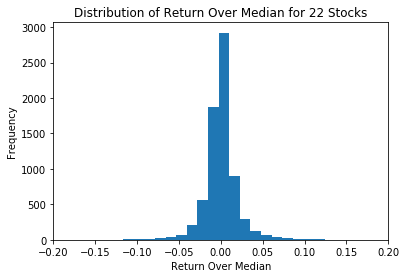

In [4]:
s2 = pd.Series(excess1.iloc[:-1, :].values.flatten())
ax2 = s2.plot.hist(bins=50)
ax2.set_xlim(-0.2,0.2)
ax2.set_xlabel('Return Over Median')
ax2.set_title('Distribution of Return Over Median for 22 Stocks')
plt.savefig('distribution_over_median.png')

Instead of returning the numerical value of excess return over median, we can also simply return the sign. Using categorical rather than numerical labels alleviates problems that can arise due to extreme outlier returns [Zhu et al. 2012].

In [5]:
excess2 = excess_over_median(data, binary=True)
excess2.head()

c:\users\ruifan\mlfinlab\mlfinlab\labeling\excess_over_median.py:41: RuntimeWarning: invalid value encountered in sign
  return np.sign(returns_over_median)


,AMD,FB,BABA,NVDA,MSFT,AAL,C,JPM,COST,F,...,UA,ZM,UBER,NOK,VZ,AAPL,PFE,CVX,SYY,CCL
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-22,1.0,-1.0,-1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,...,-1.0,NaN,NaN,1.0,1.0,1.0,-1.0,-1.0,1.0,-1.0
2019-01-23,1.0,1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,...,1.0,NaN,NaN,1.0,-1.0,-1.0,-1.0,1.0,-1.0,1.0
2019-01-24,1.0,1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0,...,1.0,NaN,NaN,1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0
2019-01-25,-1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,-1.0,...,1.0,NaN,NaN,-1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0
2019-01-28,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,...,-1.0,NaN,NaN,1.0,-1.0,-1.0,1.0,1.0,1.0,1.0


We can verify that the number of positive labels matches the number of negative labels. Note: for larger data sets, there is increased chance that some tickers will have the exact same return for a given time index. If that return is also equal to the the median, the number of positive labels may not match exactly with the number of negatives, but should be very close.

In [6]:
excess2.stack().value_counts()

-1.0    3629
 1.0    3629
 0.0      19
dtype: int64

---
## Conclusion

This notebook presents the method to label data according to excess return over median. This method can return either numerical or categorical labels for observations. Zhu et al. utilize these labels to predict monthly stock returns using linear regression and decision trees based on composite features as independent variables. In this process:
 - Forward rates of return for assets are calculated for the entire selection of stocks indexed by time bars.
 - At each time index, the median rate of return for all stocks is calculated. The median is subtracted from each stock's return to find the excess return over median.
 - If categorical labels are desired, the excess returns are converted to their signs.

This method is useful for labelling data used for training regression models and decision trees. Zhu et al. found that decision trees were slightly better at predicting outperformers than linear regression.

## References

1. Zhu, M., Philpotts, D. and Stevenson, M., 2012. The benefits of tree-based models for stock selection. Journal of Asset Management, [online] 13(6), pp.437-448. Available at: <https://link.springer.com/article/10.1057/jam.2012.17>.